# Neuronal Dynamics (Oscillating Systems)

The FitzHugh Nagumo model of a neuron is described by the following equations:

$$\dot{v} = -v(v-a)(v-1)-w $$
$$\dot{w} = \epsilon (v - \gamma w)$$

## Question 1

Solve for the v and w nullclines, define them as functions, and plot them for $\gamma = 2$ and $\gamma = 8$. Use $\epsilon = 0.01$ and $a = 0.1$. Make sure that the X and Y limits of your plots show all relavant dynamics.



In [15]:
import numpy as np
from scipy.integrate import odeint
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def vNullcline(v, a_g):
    w = -v*(v-a_g)*(v-1)
    
    return(w)

def wNullcline(w, gamma_g):
    v = gamma_g*w
    
    return(v)

In [3]:
gamma_1 = 2
gamma_2 = 8
eps = 0.01
a = 0.1

(-0.02, 0.2)

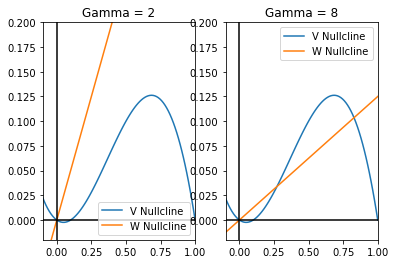

In [12]:
v = np.linspace(-0.2,1,100)
w = np.linspace(-0.1,0.3,100)


plt.subplot(1,2,1) 
plt.plot(v, vNullcline(v, a),label = 'V Nullcline')
plt.plot(wNullcline(w, gamma_1), w,label = 'W Nullcline')
plt.plot
plt.legend()

plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')


plt.xlim(-0.1,1)
plt.ylim(-0.02,0.2)
plt.title('Gamma = 2')


plt.subplot(1,2,2) 
plt.plot(v, vNullcline(v, a), label = 'V Nullcline')
plt.plot(wNullcline(w, gamma_2), w, label = 'W Nullcline')
plt.title('Gamma = 8')
plt.plot
plt.legend()

plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')


plt.xlim(-0.1,1)
plt.ylim(-0.02,0.2)

## Question 2

Plot the phase portraits for both of the $\gamma$ parameter values. 
How has the phase flow changed by changing $\gamma$? What happens to the set of possible state trajectories when $\gamma$ becomes large?


In [5]:
def fitzHughNagumo_NoI(state, t):
    v = state[0]
    w = state[1]
    
    # Our equations
    dv = -v*(v-a)*(v-1) - w 
    dw = eps*(v-gamma*w)
    
    #a --> threshold of depolarization
    #gamma --> sensitivity of potassium channels to voltage
    #epsilon --> speed of responsiveness of potassium channels
    return(dv,dw)

In [10]:
xlim = [-0.3,1]
ylim = [-0.01, 0.2]

npoints = 15

#Lines up our phase vectors & our nullclines for visualization
v = np.linspace(xlim[0], xlim[1], 100)
w = np.linspace(ylim[0], ylim[1], 100)

s1 = np.linspace(xlim[0], xlim[1], npoints)
s2 = np.linspace(ylim[0], ylim[1], npoints)

S1, S2 = np.meshgrid(s1, s2)

q, p = np.zeros(S1.shape), np.zeros(S2.shape)

NI, NJ = S1.shape

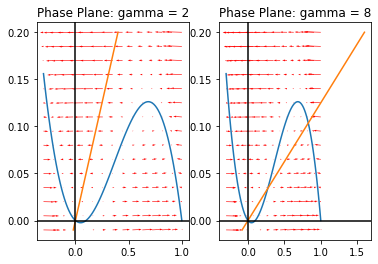

In [11]:
plt.subplot(1,2,1)  
gamma = 2 


for i in range(NI):
    for j in range(NJ):
        x = S1[i,j]
        y = S2[i,j]
        
        #Calculate the "direction" of flow
        S_dot = fitzHughNagumo_NoI([x,y], [])
        
        p[i,j] = S_dot[0]
        q[i,j] = S_dot[1]
        
        

#Plot the arrows showing direction of dynamical flow        
plt.quiver(S1,S2,p,q, color = 'r')

#plot nullclines
plt.plot(v, vNullcline(v,a))
plt.plot(wNullcline(w,gamma), w)
plt.title('Phase Plane: gamma = 2')


#plot axes lines
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')


plt.subplot(1,2,2)
gamma = 8


#Plot the arrows showing direction of dynamical flow        
plt.quiver(S1,S2,p,q, color = 'r')

#plot nullclines
plt.plot(v, vNullcline(v,a))
plt.plot(wNullcline(w,gamma), w)
plt.title('Phase Plane: gamma = 8')


#plot axes lines
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')

#### Answer
* As gamma increases, the degree of change of 'w' nullcline decreases, whereas 'v' nullcline remains unchanged. 
* When gama become large, the set of possible state trajectories begins to behave much more like the 'v' and 'w' nullclines. 

## Question 3
Numerically integrate the FH equations with the addition of a step impulse.

To add a step impulse to this simulation consider that an outside change in the current $I(t)$ that effect the $\dot{v}$ so that

$$\dot{v} = -v(v-a)(v-1)-w + I(t)$$
$$\dot{w} = \epsilon (v - \gamma w)$$


* Define a new function of the FN equations with a forcing function `input(Ton,q)` where $I(t) = 0$ until `Ton` whereafter $I(t) = q$
* Simulate a sudden increase in I. Plot $v(t)$ and $w(t)$. What happens to the neuron?
#### Answer: A sudden increase in I leads means that the neuron will not properly function, it will improperly/hardly fire.
* Determine the minimum value of $I$ that causes full spiking to 1 significant digit by trying different input amplitudes. 
#### Answer: If I = 0.02, then it still causes full spiking if the time interval between TOn - TOff = 9.19 (input TOn = 5.81). 
* What is the lowest step current amplitude to 1 sig fig to generate **repetitive firing**?
#### Answer: A time interval of 9.19 ms between TOn - TOff will generate the lowest step current that can generate repetitive firing.

Enter TOn: 50.81


Max value of I: 0.02


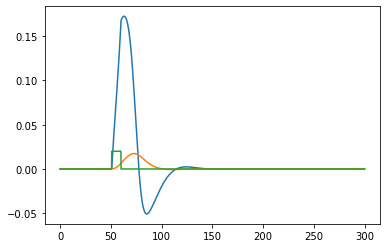

In [74]:
def fitzHughNagumo(state, t):
    v = state[0]
    w = state[1]
    
    # Our equations
    dv = -v*(v-a)*(v-1) - w + Ipulse(t, tOn,tOff, IOn, IOff) #1 is peak voltage
    dw = eps*(v-gamma*w)
    
    return(dv,dw)


#Define the pulse function

def Ipulse(t, tOn,tOff, IOn, IOff):
    if(t>tOn) & (t<tOff):
        I = IOn
    else:
        I = IOff
    return(I)


def computeI(t):
    I = np.zeros(len(t))
    for i in np.arange(0,len(t),1):
        I[i] = Ipulse(t[i],tOn,tOff,IOn,IOff)
    return(I)


t = np.linspace(0,300,1500)

tOn = float(input('Enter TOn:'))
tOff = 60
IOn = 0.02
IOff = 0



eps = 0.01
a = 0.1 #Between 0-1
gamma = 5

state0 = [0,0]
state = odeint(fitzHughNagumo, state0, t)

plt.plot(t, state[:,0])
plt.plot(t, state[:,1])
plt.plot(t, computeI(t))
print('Max value of I:', max(computeI(t))) #the greatest value of I 


